In [1]:
import warnings
warnings.filterwarnings("ignore")

## Inporting libraries

In [2]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns
import sys
assert sys.version_info >= (3, 5)
#import sklearn
#assert sklearn.__version__ >= "0.20"
import os

# to make this notebook's output stable across runs
np.random.seed(42)

## Import data

In [3]:
dataset=pd.read_csv("dataset.csv")

## Explore dataset

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

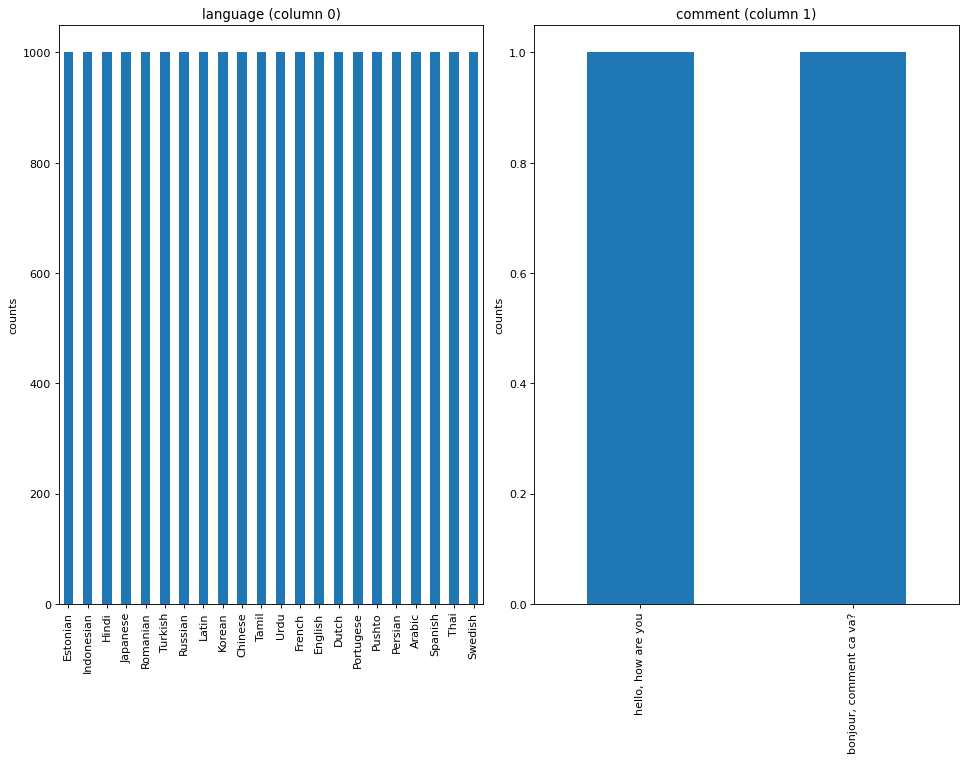

In [5]:
plotPerColumnDistribution(dataset, 10, 5)

## Separate features and  Split training and testing

In [6]:
#split the data into train and test set
from sklearn.model_selection         import train_test_split
text = dataset.Text
language = dataset.language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [7]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  17600
lenght of test data =  4400


In [8]:
len(train_features[0])

339

In [9]:

t=[]
for i in (train_features):
    t.append(len(i))
t
    


[130,
 265,
 153,
 216,
 141,
 143,
 274,
 150,
 453,
 411,
 1041,
 248,
 708,
 343,
 319,
 205,
 141,
 274,
 457,
 460,
 363,
 238,
 220,
 178,
 310,
 466,
 307,
 237,
 528,
 134,
 137,
 187,
 178,
 189,
 372,
 205,
 735,
 151,
 186,
 128,
 315,
 375,
 167,
 461,
 485,
 150,
 254,
 198,
 277,
 138,
 379,
 148,
 357,
 152,
 263,
 147,
 207,
 181,
 171,
 226,
 146,
 205,
 376,
 126,
 232,
 241,
 203,
 482,
 347,
 1289,
 312,
 251,
 365,
 555,
 973,
 277,
 143,
 223,
 221,
 596,
 329,
 316,
 138,
 193,
 1330,
 289,
 177,
 265,
 1121,
 333,
 565,
 327,
 151,
 149,
 145,
 440,
 457,
 173,
 420,
 124,
 169,
 228,
 142,
 545,
 218,
 303,
 173,
 210,
 1001,
 214,
 531,
 1296,
 827,
 426,
 339,
 409,
 310,
 311,
 240,
 128,
 365,
 120,
 334,
 559,
 223,
 320,
 308,
 341,
 610,
 154,
 632,
 363,
 172,
 156,
 669,
 544,
 1125,
 224,
 834,
 176,
 174,
 167,
 202,
 573,
 527,
 178,
 542,
 232,
 197,
 268,
 270,
 175,
 327,
 315,
 313,
 326,
 962,
 164,
 286,
 137,
 315,
 460,
 794,
 476,
 264,
 54

### Feature extraction

In [10]:
from sklearn.feature_extraction import text
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder


In [80]:
dataset.head()

,Text,language,comment
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,"hello, how are you"
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,"bonjour, comment ca va?"
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,NaN
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,NaN
4,de spons behoort tot het geslacht haliclona en...,Dutch,NaN


In [83]:
_arg2 = []
_arg3 = []

In [86]:
toby = pd.DataFrame({"Text":_arg2,"language":_arg3})

ValueError: Empty data passed with indices specified.

In [85]:
toby.head()

,Text,language


In [12]:
#uni gram
uni_vector =   text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(17600, 1000)

In [13]:
type(bag_of_words_uni)

scipy.sparse.csr.csr_matrix

In [14]:
#bigram
bi_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [15]:
#trigram
tri_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [16]:
#3chargram
char3_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [17]:
#4chargram
char4_vector =  text.CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [18]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
#char5_feature_names = char5_vector.get_feature_names()
#char6_feature_names = char6_vector.get_feature_names()
#char7_feature_names = char7_vector.get_feature_names()
#char8_feature_names = char8_vector.get_feature_names()
#char9_feature_names = char9_vector.get_feature_names()
#char10_feature_names = char10_vector.get_feature_names()

In [19]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,a,aan,aasta,aastal,ab,ac,ad,adalah,after,akan,...,일,있는,있다,자신의,한다,함께,また,年,年月日,月日
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
#char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
#char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
#char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
#char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
#char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
#char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

## Train Machine Learning Algorithms using Train Data

#### Random Forest Classifier

In [22]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

#### LinearSVC()

In [23]:
from sklearn.svm                     import LinearSVC
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

## Testing

In [24]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

,a,aan,aasta,aastal,ab,ac,ad,adalah,after,akan,...,일,있는,있다,자신의,한다,함께,また,年,年月日,月日
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [26]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)


In [27]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [28]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [29]:
from sklearn.metrics                 import accuracy_score

#### Random forest classifier

In [30]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

#### LinearSVC

In [31]:
predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

## Selecting Best model

In [32]:
!pip install prettytable

In [33]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC       "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2),round(bi_lsvc,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2),round(tri_lsvc,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2),round(char4_lsvc,2)])

In [34]:
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+-----------------+---------------------------------+------------------------+
|                 |    Random forest Classififier   |      Linear SVC        |
+-----------------+---------------------------------+------------------------+
|     Uni Gram    |               0.94              |          0.94          |
|     Bi Gram     |               0.57              |          0.57          |
|     Tri Gram    |               0.26              |          0.26          |
|   3 Char Gram   |               0.94              |          0.93          |
|   4 Char Gram   |               0.9               |          0.9           |
+-----------------+---------------------------------+------------------------+


              precision    recall  f1-score   support

      Arabic       0.98      0.98      0.98       191
     Chinese       0.65      0.32      0.43       191
       Dutch       1.00      1.00      1.00       201
     English       0.85      0.98      0.91       207
    Estonian       0.98      0.94      0.96       198
      French       0.96      1.00      0.98       183
       Hindi       1.00      0.99      0.99       191
  Indonesian       1.00      0.96      0.98       191
    Japanese       0.48      0.83      0.61       195
      Korean       1.00      0.94      0.97       215
       Latin       0.96      0.90      0.93       194
     Persian       0.99      0.98      0.99       198
   Portugese       0.98      0.99      0.98       204
      Pushto       1.00      0.94      0.97       219
    Romanian       1.00      0.98      0.99       208
     Russian       0.98      0.98      0.98       203
     Spanish       0.99      0.96      0.97       202
     Swedish       1.00    

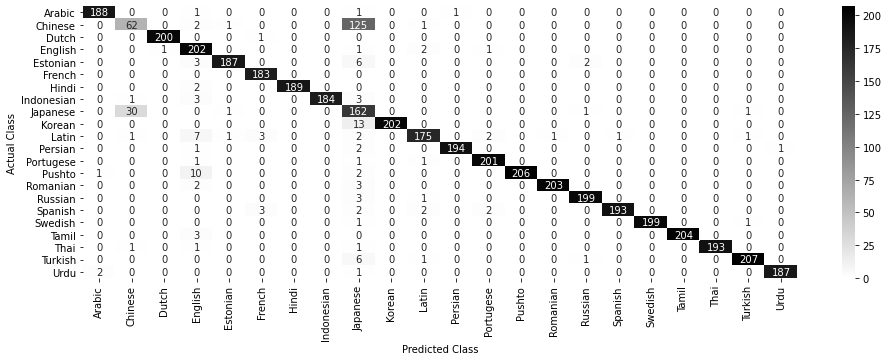

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, predictions_uni_rfc))
plt.figure(figsize = (16,5))
sns.heatmap(confusion_matrix(test_labels, predictions_uni_rfc), annot=True, fmt='1', xticklabels=rfc_uni.classes_, yticklabels=rfc_uni.classes_, cmap='binary')

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Application Phase

In [36]:
features = uni_vector.transform(dataset.Text)
target=language

In [37]:
 #apply random forest on train dataset
model=rfc_uni.fit(features, target)


In [38]:
import joblib

In [39]:
joblib.dump(model, 'JupyterlanguageForest.pkl')

['JupyterlanguageForest.pkl']

#### New text

In [40]:
comment = """Uno por pobre y feo, hombre
Pero antoja yo, ay ome
Tengo la camisa negra
Hoy mi amor está de luto
Hoy tengo en el alma una pena
Y es por culpa de tu embrujo"""

In [55]:
_arg1 = ['عدم عل عُقر ويتّفق ارتكبها. شعار سقطت وفي ٣٠, ذات بالفشل ومحاولة والمعدات هو. بينما الأسيوي بريطانيا-فرنسا تحت بل, انه أسيا تحرّكت واندونيسيا، كل. مع الإنزال الأسيوي ضرب.','Quels sont les mots utilisés en français ?', 'Uno por pobre y feo']
#input = pd.DataFrame(comment, columns = ['comment'])

In [ ]:
input.head()

#### Convert new text to Feature vector

In [75]:
user_input= uni_vector.transform(comment)
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)

In [73]:
uni_feature_names

['a',
 'aan',
 'aasta',
 'aastal',
 'ab',
 'ac',
 'ad',
 'adalah',
 'after',
 'akan',
 'al',
 'album',
 'all',
 'als',
 'also',
 'american',
 'an',
 'and',
 'anno',
 'ano',
 'anos',
 'ao',
 'april',
 'apud',
 'ar',
 'are',
 'arsmedeltemperaturen',
 'arsnederbord',
 'as',
 'at',
 'atau',
 'ate',
 'att',
 'au',
 'augusti',
 'aux',
 'av',
 'avec',
 'ayam',
 'b',
 'bagian',
 'bahasa',
 'bahwa',
 'band',
 'be',
 'beberapa',
 'been',
 'beskrevs',
 'bij',
 'bir',
 'bu',
 'but',
 'by',
 'c',
 'ca',
 'care',
 'catalogue',
 'ce',
 'cette',
 'city',
 'club',
 'clubs',
 'cok',
 'com',
 'comme',
 'commune',
 'como',
 'con',
 'contra',
 'cu',
 'cum',
 'd',
 'da',
 'daha',
 'dalam',
 'dan',
 'dans',
 'dapat',
 'dar',
 'dari',
 'das',
 'dat',
 'de',
 'del',
 'delen',
 'den',
 'dengan',
 'des',
 'desde',
 'det',
 'deux',
 'deze',
 'di',
 'dia',
 'die',
 'din',
 'dit',
 'do',
 'door',
 'dos',
 'du',
 'dun',
 'dupa',
 'durante',
 'e',
 'een',
 'eerst',
 'eesti',
 'ei',
 'el',
 'ela',
 'ele',
 'ella',
 'e

#### Apply Trained model on Feature vector of unseen data

In [53]:
# fit the model on input
language = model.predict(user_input) 

In [54]:
a=[ language[i] for i in [0] ]
print("Language : ",a)

Language :  ['Arabic']


In [ ]:
language 

In [78]:


loadmodel = joblib.load('JupyterlanguageForest.pkl')

    
# Load data from tableau (brought in as lists) into a dictionary
user_input= uni_vector.transform(_arg1)
a=user_input.toarray()

user_input=pd.DataFrame(a, columns=uni_feature_names)

#Use the loaded model to develop predictions for the new data from Tableau
predictions = loadmodel.predict(user_input)
[prediction for prediction in predictions]


['Arabic', 'Japanese', 'Spanish']